In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy as sp
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from scipy.signal import detrend

import warnings
warnings.filterwarnings("ignore")

In [53]:
# Load Data

data_path = 'mt_steel.csv'

steel_dat = pd.read_csv(data_path)

steel_dat.info()
print(steel_dat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EXPORT  44 non-null     float64
 1   YEAR    44 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 836.0 bytes
    EXPORT  YEAR
0     3.89  1937
1     2.41  1938
2     2.80  1939
3     8.72  1940
4     7.12  1941
5     7.24  1942
6     7.15  1943
7     6.05  1944
8     5.21  1945
9     5.03  1946
10    6.88  1947
11    4.70  1948
12    5.06  1949
13    3.16  1950
14    3.62  1951
15    4.55  1952
16    2.43  1953
17    3.16  1954
18    4.55  1955
19    5.17  1956
20    6.95  1957
21    3.46  1958
22    2.13  1959
23    3.47  1960
24    2.79  1961
25    2.52  1962
26    2.80  1963
27    4.04  1964
28    3.08  1965
29    2.28  1966
30    2.17  1967
31    2.78  1968
32    5.94  1969
33    8.14  1970
34    3.55  1971
35    3.61  1972
36    5.06  1973
37    7.13  1974
38    4.15  1975
39    3.86  197

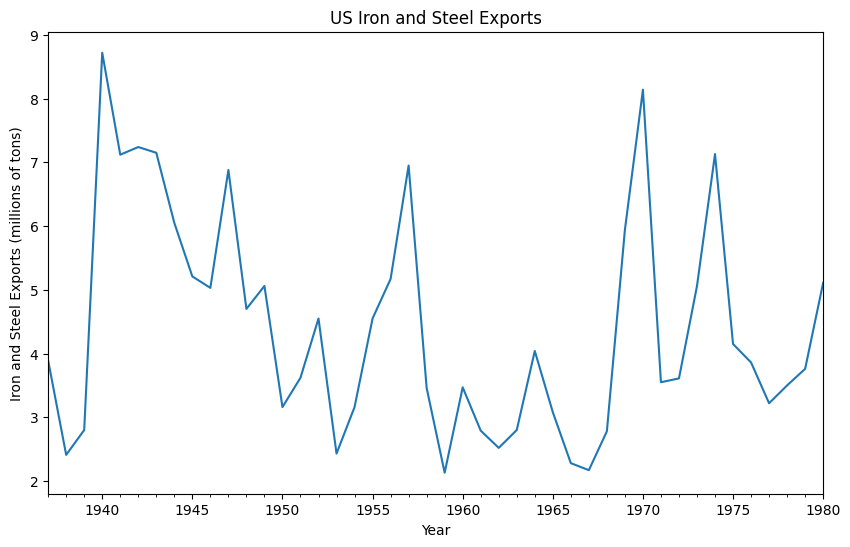

In [54]:
# Convert date column to a date class variable

steel_dat['YEAR'] = pd.to_datetime(steel_dat['YEAR'], format="%Y")

# Create indexed series


steel_ts = pd.Series(steel_dat['EXPORT'].values, index=steel_dat['YEAR'])


#Plot the series
plt.figure(figsize=(10, 6))
steel_ts.plot()
plt.title("US Iron and Steel Exports")
plt.xlabel("Year")
plt.ylabel("Iron and Steel Exports (millions of tons)")
plt.show()

In [55]:
#execute the Ljung Box test on the Steel series using 5 lags
EXPORTS = steel_dat[['EXPORT']]
sm.stats.acorr_ljungbox(EXPORTS, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,12.151048,0.032776


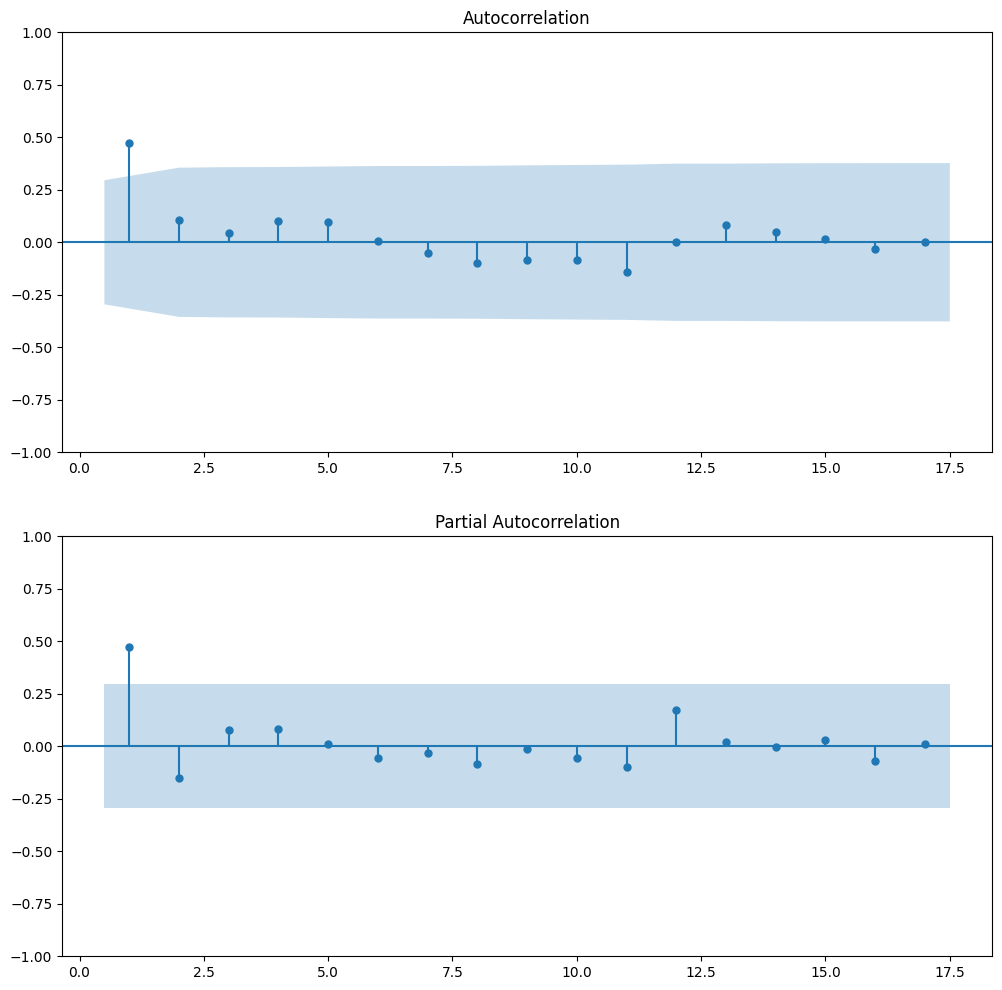

In [56]:
#Plot the ACF and PACF for the Steel series

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(steel_ts, ax=ax1, zero=False)
plot_pacf(steel_ts, ax=ax2, zero=False)
plt.show()

In [57]:
#Dickey Fuller (single mean version)
adfuller(steel_ts, regression='c')

(np.float64(-3.837652178900703),
 np.float64(0.00254474237765945),
 1,
 42,
 {'1%': np.float64(-3.596635636000432),
  '5%': np.float64(-2.933297331821618),
  '10%': np.float64(-2.6049909750566895)},
 np.float64(116.78753840925027))

In [58]:
print(steel_ts)

YEAR
1937-01-01    3.89
1938-01-01    2.41
1939-01-01    2.80
1940-01-01    8.72
1941-01-01    7.12
1942-01-01    7.24
1943-01-01    7.15
1944-01-01    6.05
1945-01-01    5.21
1946-01-01    5.03
1947-01-01    6.88
1948-01-01    4.70
1949-01-01    5.06
1950-01-01    3.16
1951-01-01    3.62
1952-01-01    4.55
1953-01-01    2.43
1954-01-01    3.16
1955-01-01    4.55
1956-01-01    5.17
1957-01-01    6.95
1958-01-01    3.46
1959-01-01    2.13
1960-01-01    3.47
1961-01-01    2.79
1962-01-01    2.52
1963-01-01    2.80
1964-01-01    4.04
1965-01-01    3.08
1966-01-01    2.28
1967-01-01    2.17
1968-01-01    2.78
1969-01-01    5.94
1970-01-01    8.14
1971-01-01    3.55
1972-01-01    3.61
1973-01-01    5.06
1974-01-01    7.13
1975-01-01    4.15
1976-01-01    3.86
1977-01-01    3.22
1978-01-01    3.50
1979-01-01    3.76
1980-01-01    5.11
dtype: float64


<h1 style="color:skyblue; font-weight:bold;">Model 1</h1>


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   44
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -81.186
Date:                Fri, 11 Oct 2024   AIC                            168.371
Time:                        10:39:15   BIC                            173.724
Sample:                    01-01-1937   HQIC                           170.356
                         - 01-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4213      0.554      7.975      0.000       3.335       5.508
ar.L1          0.4642      0.159      2.919      0.004       0.152       0.776
sigma2         2.3323      0.577      4.044      0.0

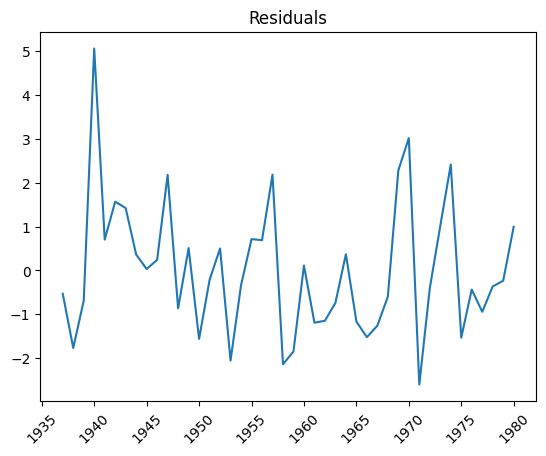

In [59]:
# Fit ARIMA(1,0,0) model to the data

fit_1 = ARIMA(steel_ts, order=(1,0,0)).fit()

# Summary of the ARIMA model
print(fit_1.summary())

# Examine residuals from the model
residuals = fit_1.resid
plt.plot(residuals)
plt.title('Residuals')
plt.xticks(rotation=45)
plt.show()

#Generate the predicted values for the series
pred_units1 = fit_1.get_prediction()
print(pred_units1)


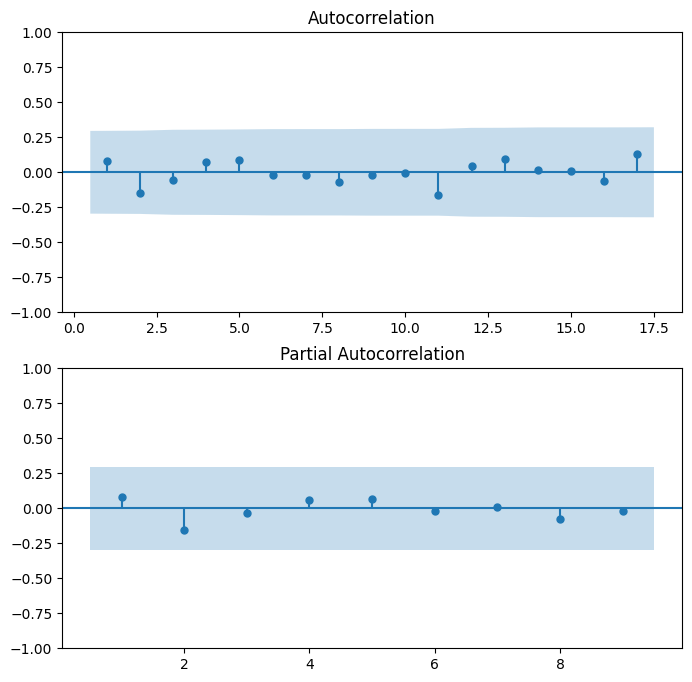

In [60]:
# Plot ACF and PACF for residuals

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(residuals, ax=ax1, zero=False)
plot_pacf(residuals, ax=ax2, zero=False, lags=9)
plt.show()


In [61]:
#execute the Ljung Box test on the residuals

sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,2.509502,0.990737


In [62]:
# convert to data frame
predicted_mean = pred_units1.predicted_mean
conf_int = pred_units1.conf_int()

prediction_df = pd.DataFrame({
    'predicted_mean': predicted_mean,
    'lower_bound': conf_int.iloc[:, 0],
    'upper_bound': conf_int.iloc[:, 1]
})
prediction_df.head()

,predicted_mean,lower_bound,upper_bound
1937-01-01,4.421282,1.041937,7.800627
1938-01-01,4.174680,1.181428,7.167932
1939-01-01,3.487717,0.494465,6.480969
1940-01-01,3.668741,0.675489,6.661993
1941-01-01,6.416592,3.423340,9.409844


In [63]:
# add back actuals --
#prediction_df = pd.concat([prediction_df,steel_ts.to_frame(name='EXPORT')],axis=1)
prediction_df['EXPORT'] = steel_ts
prediction_df.tail()

,predicted_mean,lower_bound,upper_bound,EXPORT
1976-01-01,4.295363,1.302111,7.288615,3.86
1977-01-01,4.160755,1.167503,7.154007,3.22
1978-01-01,3.863690,0.870438,6.856942,3.50
1979-01-01,3.993656,1.000404,6.986908,3.76
1980-01-01,4.114339,1.121087,7.107591,5.11


In [64]:
# calc error
errors = prediction_df['EXPORT'] - prediction_df['predicted_mean']
# absolue value of error
errors_abs = errors.abs()
# -- mape --
mape = (errors_abs/prediction_df['EXPORT'].abs()).mean()
# -- rmse
rmse = (errors**2).mean()**0.5
# -- print it out
print(f'MAPE = {mape:.3%}')
print(f'RMSE = {rmse:,.3f}')


MAPE = 29.548%
RMSE = 1.528


<h1 style="color:skyblue; font-weight:bold;">Model 2</h1>


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   44
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -80.675
Date:                Fri, 11 Oct 2024   AIC                            169.351
Time:                        10:39:16   BIC                            176.488
Sample:                    01-01-1937   HQIC                           171.997
                         - 01-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4351      0.484      9.165      0.000       3.487       5.384
ar.L1          0.5369      0.196      2.737      0.006       0.152       0.921
ar.L2         -0.1515      0.199     -0.763      0.4

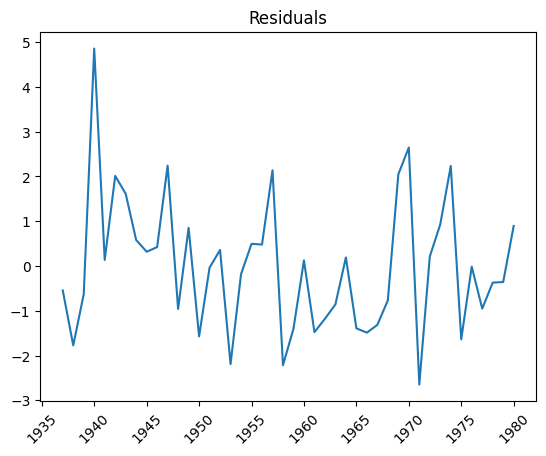

In [65]:
# Fit ARIMA(2,0,0) model to the data

fit_2 = ARIMA(steel_ts, order=(2,0,0)).fit()

# Summary of the ARIMA model
print(fit_2.summary())

# Examine residuals from the model
residuals = fit_2.resid
plt.plot(residuals)
plt.title('Residuals')
plt.xticks(rotation=45)
plt.show()

#Generate the predicted values for the series
pred_units2 = fit_2.get_prediction()
print(pred_units2)


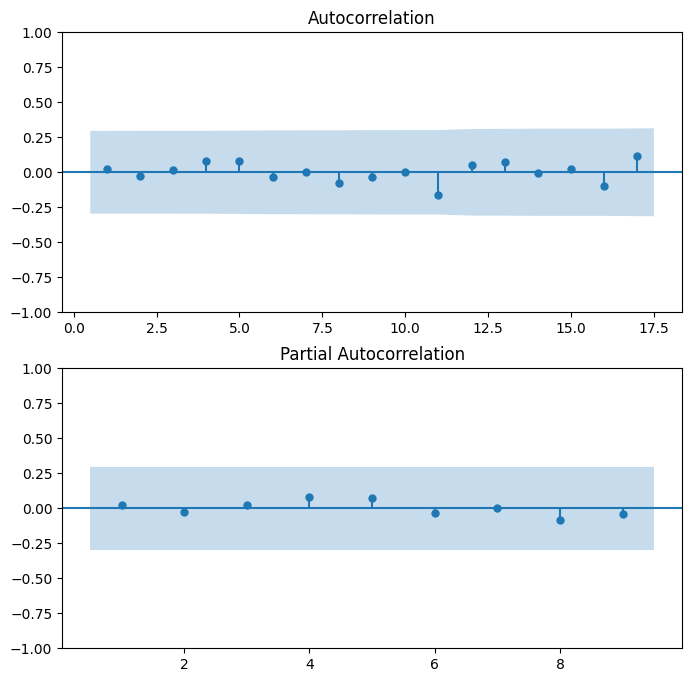

In [66]:
# Plot ACF and PACF for residuals

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(residuals, ax=ax1, zero=False)
plot_pacf(residuals, ax=ax2, zero=False, lags=9)
plt.show()


In [67]:
#execute the Ljung Box test on the residuals

sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,1.13621,0.999692


In [68]:
# convert to data frame
predicted_mean = pred_units2.predicted_mean
conf_int = pred_units2.conf_int()

prediction_df = pd.DataFrame({
    'predicted_mean': predicted_mean,
    'lower_bound': conf_int.iloc[:, 0],
    'upper_bound': conf_int.iloc[:, 1]
})
prediction_df.head()

,predicted_mean,lower_bound,upper_bound
1937-01-01,4.435149,1.053420,7.816877
1938-01-01,4.180957,1.189353,7.172562
1939-01-01,3.430398,0.473322,6.387474
1940-01-01,3.864007,0.906931,6.821083
1941-01-01,6.983475,4.026398,9.940551


In [69]:
# add back actuals --
#prediction_df = pd.concat([prediction_df,steel_ts.to_frame(name='EXPORT')],axis=1)
prediction_df['EXPORT'] = steel_ts
prediction_df.tail()

,predicted_mean,lower_bound,upper_bound,EXPORT
1976-01-01,3.873793,0.916717,6.830869,3.86
1977-01-01,4.169540,1.212464,7.126616,3.22
1978-01-01,3.869846,0.912770,6.826922,3.50
1979-01-01,4.117139,1.160063,7.074215,3.76
1980-01-01,4.214319,1.257243,7.171395,5.11


In [70]:
# calc error
errors = prediction_df['EXPORT'] - prediction_df['predicted_mean']
# absolue value of error
errors_abs = errors.abs()
# -- mape --
mape = (errors_abs/prediction_df['EXPORT'].abs()).mean()
# -- rmse
rmse = (errors**2).mean()**0.5
# -- print it out
print(f'MAPE = {mape:.3%}')
print(f'RMSE = {rmse:,.3f}')


MAPE = 29.280%
RMSE = 1.510


<h1 style="color:skyblue; font-weight:bold;">Model 3</h1>


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   44
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -80.618
Date:                Fri, 11 Oct 2024   AIC                            169.236
Time:                        10:39:17   BIC                            176.373
Sample:                    01-01-1937   HQIC                           171.883
                         - 01-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4289      0.503      8.800      0.000       3.442       5.415
ar.L1          0.2244      0.312      0.719      0.472      -0.388       0.836
ma.L1          0.3193      0.327      0.977      0.3

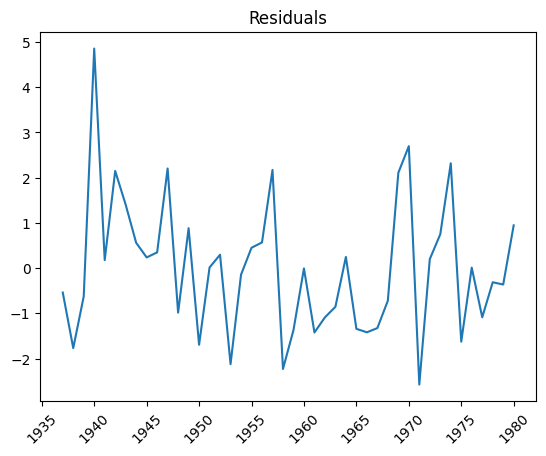

In [71]:
# Fit ARIMA(1,0,1) model to the data

fit_3 = ARIMA(steel_ts, order=(1,0,1)).fit()

# Summary of the ARIMA model
print(fit_3.summary())

# Examine residuals from the model
residuals = fit_3.resid
plt.plot(residuals)
plt.title('Residuals')
plt.xticks(rotation=45)
plt.show()

pred_units3 = fit_3.get_prediction()
print(pred_units3)


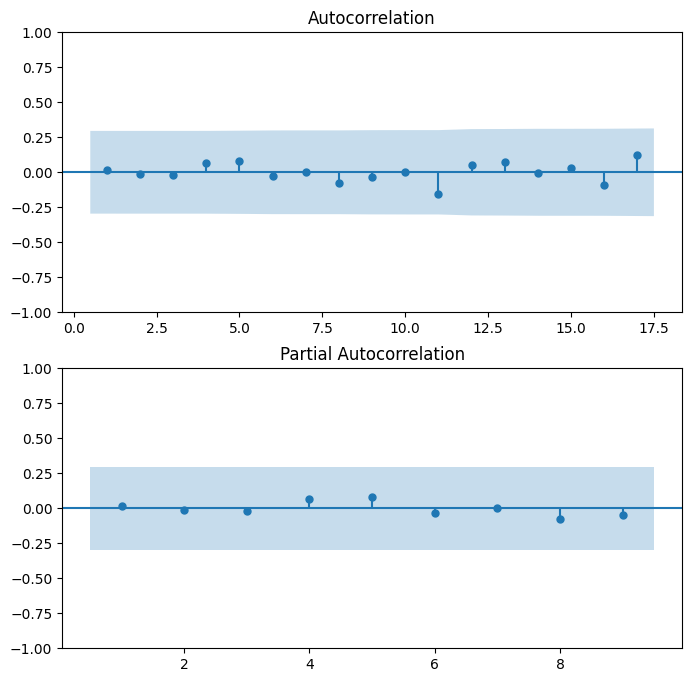

In [72]:
# Plot ACF and PACF for residuals

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(residuals, ax=ax1, zero=False)
plot_pacf(residuals, ax=ax2, zero=False, lags=9)
plt.show()


In [73]:
#execute the Ljung Box test on the residuals

sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,1.038854,0.999795


In [74]:
# convert to data frame
predicted_mean = pred_units3.predicted_mean
conf_int = pred_units3.conf_int()

prediction_df = pd.DataFrame({
    'predicted_mean': predicted_mean,
    'lower_bound': conf_int.iloc[:, 0],
    'upper_bound': conf_int.iloc[:, 1]
})
prediction_df.head()

,predicted_mean,lower_bound,upper_bound
1937-01-01,4.428864,1.047343,7.810385
1938-01-01,4.176738,1.188185,7.165291
1939-01-01,3.425086,0.468498,6.381674
1940-01-01,3.864276,0.910881,6.817670
1941-01-01,6.941759,3.988689,9.894829


In [75]:
# add back actuals --
#prediction_df = pd.concat([prediction_df,steel_ts.to_frame(name='EXPORT')],axis=1)
prediction_df['EXPORT'] = steel_ts
prediction_df.tail()

,predicted_mean,lower_bound,upper_bound,EXPORT
1976-01-01,3.847225,0.894192,6.800258,3.86
1977-01-01,4.305305,1.352272,7.258337,3.22
1978-01-01,3.811084,0.858051,6.764116,3.50
1979-01-01,4.121121,1.168088,7.074153,3.76
1980-01-01,4.163481,1.210448,7.116514,5.11


In [76]:
# calc error
errors = prediction_df['EXPORT'] - prediction_df['predicted_mean']
# absolue value of error
errors_abs = errors.abs()
# -- mape --
mape = (errors_abs/prediction_df['EXPORT'].abs()).mean()
# -- rmse
rmse = (errors**2).mean()**0.5
# -- print it out
print(f'MAPE = {mape:.3%}')
print(f'RMSE = {rmse:,.3f}')


MAPE = 28.850%
RMSE = 1.508


<h1 style="color:skyblue; font-weight:bold;">Model 4</h1>


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   44
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 -80.595
Date:                Fri, 11 Oct 2024   AIC                            169.191
Time:                        10:39:18   BIC                            176.327
Sample:                    01-01-1937   HQIC                           171.837
                         - 01-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4324      0.501      8.846      0.000       3.450       5.414
ma.L1          0.5478      0.204      2.688      0.007       0.148       0.947
ma.L2          0.1267      0.172      0.736      0.4

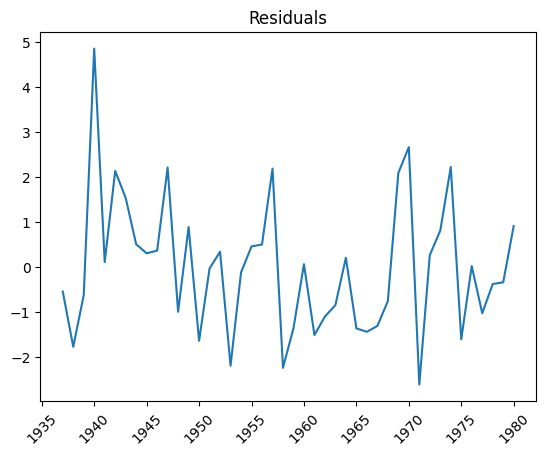

In [77]:
# Fit ARIMA(0,0,2) model to the data

fit_4 = ARIMA(steel_ts, order=(0,0,2)).fit()

# Summary of the ARIMA model
print(fit_4.summary())

# Examine residuals from the model
residuals = fit_4.resid
plt.plot(residuals)
plt.title('Residuals')
plt.xticks(rotation=45)
plt.show()

pred_units4 = fit_4.get_prediction()
print(pred_units4)


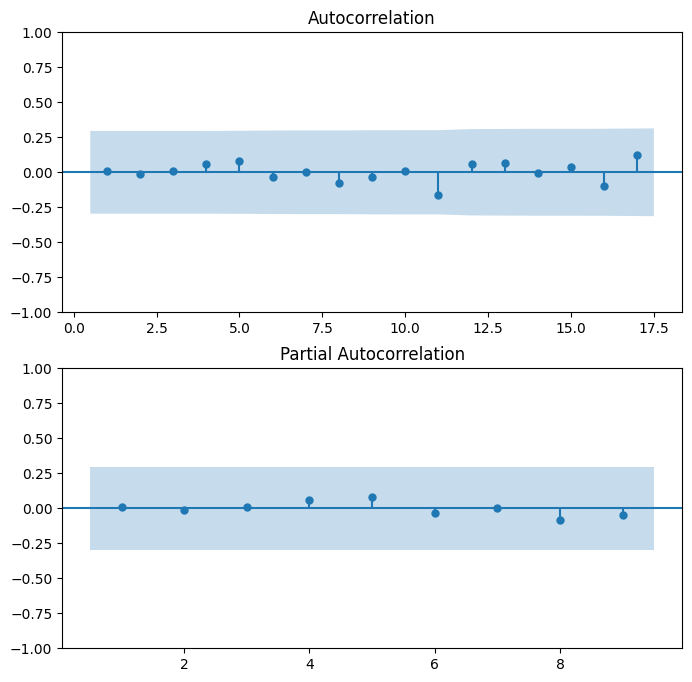

In [78]:
# Plot ACF and PACF for residuals

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(residuals, ax=ax1, zero=False)
plot_pacf(residuals, ax=ax2, zero=False, lags=9)
plt.show()


In [79]:
#execute the Ljung Box test on the residuals

sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,0.996893,0.99983


In [80]:
# convert to data frame
predicted_mean = pred_units4.predicted_mean
conf_int = pred_units4.conf_int()

prediction_df = pd.DataFrame({
    'predicted_mean': predicted_mean,
    'lower_bound': conf_int.iloc[:, 0],
    'upper_bound': conf_int.iloc[:, 1]
})
prediction_df.head()

,predicted_mean,lower_bound,upper_bound
1937-01-01,4.432361,1.046496,7.818227
1938-01-01,4.178030,1.187520,7.168540
1939-01-01,3.419651,0.466953,6.372349
1940-01-01,3.874763,0.923307,6.826220
1941-01-01,7.007896,4.056466,9.959327


In [81]:
# add back actuals --
#prediction_df = pd.concat([prediction_df,steel_ts.to_frame(name='EXPORT')],axis=1)
prediction_df['EXPORT'] = steel_ts
prediction_df.tail()

,predicted_mean,lower_bound,upper_bound,EXPORT
1976-01-01,3.836526,0.885159,6.787892,3.86
1977-01-01,4.242452,1.291086,7.193818,3.22
1978-01-01,3.875249,0.923883,6.826615,3.50
1979-01-01,4.097302,1.145936,7.048669,3.76
1980-01-01,4.200063,1.248697,7.151429,5.11


In [82]:
# calc error
errors = prediction_df['EXPORT'] - prediction_df['predicted_mean']
# absolue value of error
errors_abs = errors.abs()
# -- mape --
mape = (errors_abs/prediction_df['EXPORT'].abs()).mean()
# -- rmse
rmse = (errors**2).mean()**0.5
# -- print it out
print(f'MAPE = {mape:.3%}')
print(f'RMSE = {rmse:,.3f}')


MAPE = 28.996%
RMSE = 1.507


<h5 style="color:skyblue; font-weight:bold;">Model 1 (1,0,0) was the only model with all significant values and it meets the criteria for a good model, so we will use it for our forecasting.</h5>


In [83]:
# convert to data frame
predicted_mean = pred_units1.predicted_mean
conf_int = pred_units1.conf_int()

prediction_df = pd.DataFrame({
    'predicted_mean': predicted_mean,
    'lower_bound': conf_int.iloc[:, 0],
    'upper_bound': conf_int.iloc[:, 1]
})
prediction_df.head()

,predicted_mean,lower_bound,upper_bound
1937-01-01,4.421282,1.041937,7.800627
1938-01-01,4.174680,1.181428,7.167932
1939-01-01,3.487717,0.494465,6.480969
1940-01-01,3.668741,0.675489,6.661993
1941-01-01,6.416592,3.423340,9.409844


In [84]:
# add back actuals --
#prediction_df = pd.concat([prediction_df,steel_ts.to_frame(name='EXPORT')],axis=1)
prediction_df['EXPORT'] = steel_ts
prediction_df.tail()

,predicted_mean,lower_bound,upper_bound,EXPORT
1976-01-01,4.295363,1.302111,7.288615,3.86
1977-01-01,4.160755,1.167503,7.154007,3.22
1978-01-01,3.863690,0.870438,6.856942,3.50
1979-01-01,3.993656,1.000404,6.986908,3.76
1980-01-01,4.114339,1.121087,7.107591,5.11


In [85]:
# calc error
errors = prediction_df['EXPORT'] - prediction_df['predicted_mean']
# absolue value of error
errors_abs = errors.abs()
# -- mape --
mape = (errors_abs/prediction_df['EXPORT'].abs()).mean()
# -- rmse
rmse = (errors**2).mean()**0.5
# -- print it out
print(f'MAPE = {mape:.3%}')
print(f'RMSE = {rmse:,.3f}')


MAPE = 29.548%
RMSE = 1.528


In [90]:
# Generate forecast for the next three years
forecast = fit_1.get_forecast(steps=3)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a DataFrame with forecasted values and confidence intervals
forecast_df = pd.DataFrame({
    'Forecasted_Steel_Exports': mean_forecast,
    'Lower_Bound': confidence_intervals.iloc[:, 0],
    'Upper_Bound': confidence_intervals.iloc[:, 1]
})

forecast_df


,Forecasted_Steel_Exports,Lower_Bound,Upper_Bound
1981-01-01,4.740960,1.747708,7.734212
1982-01-01,4.569665,1.269683,7.869647
1983-01-01,4.490156,1.127752,7.852560


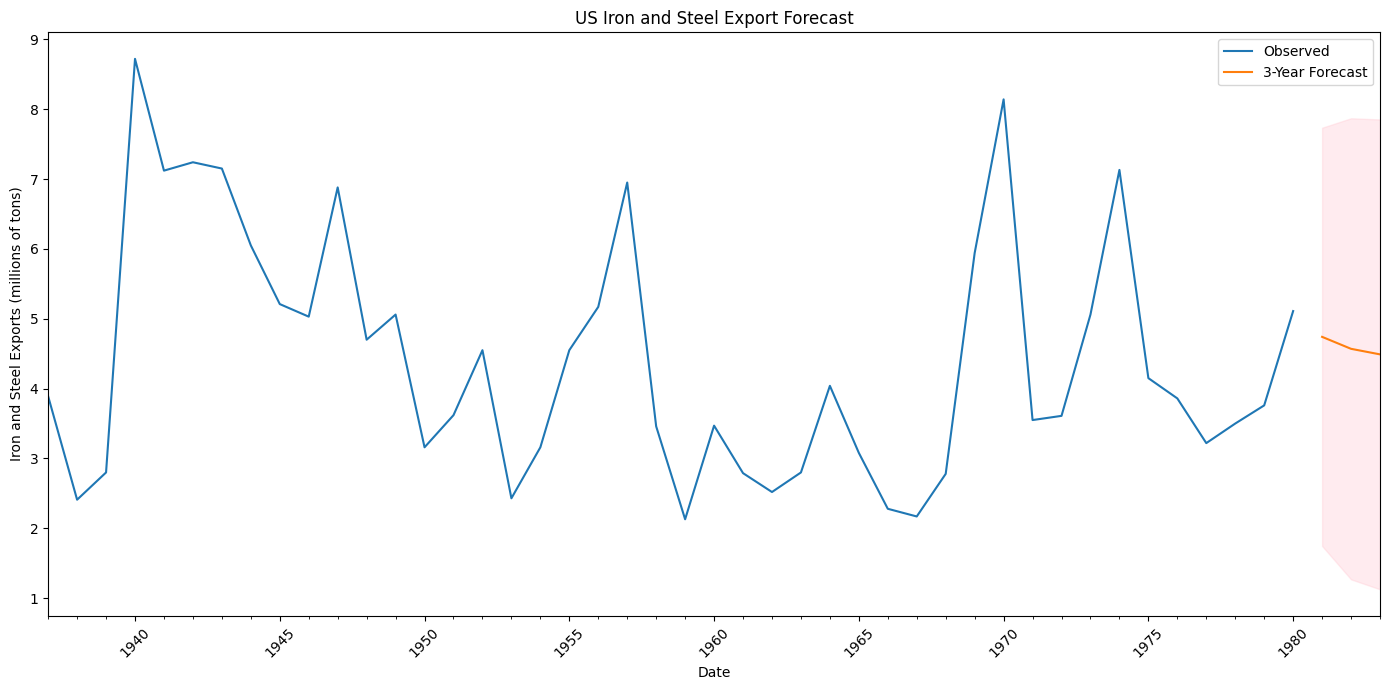

In [91]:
# Ensure the index is a DatetimeIndex
steel_ts.index = pd.to_datetime(steel_ts.index, format='%Y')

# Plot forecast
plt.figure(figsize=(14, 7))
prediction_df['EXPORT'].plot(label='Observed', legend=True)
mean_forecast.plot(label='3-Year Forecast', legend=True)
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)

# Set the x-axis limits to start from 1937
plt.xlim(pd.Timestamp('1937-01-01'), None)

plt.title("US Iron and Steel Export Forecast")
plt.xlabel("Date")
plt.ylabel("Iron and Steel Exports (millions of tons)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
